<a href="https://colab.research.google.com/github/Barttje/summercourse-ml/blob/master/neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codecentric Summercourse ML 
This is part one of the summercourse ML organised by Codecentric. 
## Neural network
In this tutorial we are going to explain how to create a neural network in Keras that is used for classifying the MNIST fashion data set. This is a dataset of 60.000 Zalando's article images.
Each training and test example is assigned to one of the following labels:
0. T-Shirt
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot 

More information about the data set can be found [here](https://www.kaggle.com/zalando-research/fashionmnist).


#Imports

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


#Data preprocessing

In [2]:
labels = {0:"T-Shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
print(labels[2])

Pullover



Create a mapper to translate the labels to the actual values.

In [0]:
(x_train_input, y_train_input), (x_test_input, y_test_input) = fashion_mnist.load_data()

The load_data() function on the dataset can be used for the datasets that are included in Keras. The other datasets that can be loaded in the same way can be found on the [Keras website](https://keras.io/datasets/). 
The load_data() function returns the train and test data set for the MNIST fashion data set. Both the test and train data are divided in two parts, the image and the label. x_train_input contains all the images we are going to use to train the neural network. The y_train_input contains all the labels for those images. 


1 Trouser


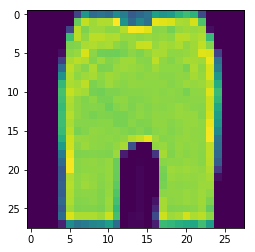

In [4]:
image_index = 8921 # Can be any number between 0 and 59999
print(y_train_input[image_index], labels[y_train_input[image_index]])
plt.imshow(x_train_input[image_index])


The *matplotlib.pyplot as plt* can be used to show the images in the dataset. 
We also print the label of that image, which is a number between 1 and 9. With the mapping we can convert this number to the actual name of the label. 


In [5]:
print(x_train_input.shape, y_train_input.shape, x_test_input.shape, y_test_input.shape)
print(x_train_input[8921][26][22])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
229


In machine learning it is really important to understand and have a feeling for the shapes of the data. 
 We need to make sure the input data matches the first layer of the model.  Above we printed the shape of each data. For x_train_input this is (60000, 28, 28). This means we have a three-dimensional array that contains 60.000 * 28 * 28 data points (~47 million). The 60.000 are the number of images we have in the dataset. The 28, 28 are the height and the width of the images in pixels. Each datapoint is a number between 0 and 255, which represents the color of that pixel. 

The y_train_input is (60000,) which is a array with 60.000 datapoints. Each datapoint represent the label of the image and is a number between 0 and 9. 

x_test_input and y_test_input are similar to x_train_input and y_train_input, only with a different amount of images. 

In [6]:
image_size = 28*28
# x_train.shape[0] is the amount of images. 
x_train = x_train_input.reshape(x_train_input.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test_input.reshape(x_test_input.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

print(x_train.shape)

(60000, 784)


The neural network that we are creating is not expecting two dimensional data. (*There are layers that accept two dimensional arrays, which we will see in the next part*) So we have translate the input data into a format the neural network can handle. We can use the reshape function to change the format from a (60000, 28, 28) to a  (60000, 784) array. Furthermore we normalize the data between 0.0 and 1.0, by dividing by 255. 

In [7]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train_input, num_classes)
y_test = keras.utils.to_categorical(y_test_input, num_classes)
print(y_train.shape, y_test.shape)

index_y = 3
print(y_train[index_y])
print(y_train_input[index_y])


(60000, 10) (10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


We also have to change the format of the labels, since the numerical values of the labels have no relation with each other. To do this, we can use the keras utils to map each label to a single column. Each Shirt (0), has 1 in the first column. All other labels have 0 in that column. The model will predict the likelyhood for each category whether that is the item in the picture.


![wow](https://github.com/Barttje/summercourse-ml/blob/master/one_hot_encoding.png?raw=true)



#Creating and training the neural network

In [8]:
neurons_in_hidden_layer=512
model = Sequential()
model.add(Dense(units=neurons_in_hidden_layer, activation='relu', input_shape=(image_size,))) # Input layer - > Hidden Layer
model.add(Dense(units=num_classes, activation='softmax')) # Hidden Layer -> Output layer
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

model.summary()
print("input: ", model.input)
print("output: ", model.output)

W0714 13:41:01.164640 140401686112128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 13:41:01.185801 140401686112128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 13:41:01.188845 140401686112128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 13:41:01.218541 140401686112128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 13:41:01.244889 140401686112128 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
input:  Tensor("dense_1_input:0", shape=(?, 784), dtype=float32)
output:  Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32)


So here we have defined three layers in the model. Although it looks like we only added two layers to the model, it is the connection between two layers that are added to the model. So in our model, the first Dense layer is the connection between the input layer and the hidden layer. The second Dense layer is the connection between the hidden layer and the output layer.  ![alt text](https://raw.githubusercontent.com/Barttje/summercourse-ml/master/Neural_network_fashion_1.png)
The following will print the input and the output the model expects. 
```
print("input: ", model.input)
print("output: ", model.input)

```

In our case it will print the following: 

*input:  Tensor("dense_19_input:0", shape=(?, 784), dtype=float32)*

*output:  Tensor("dense_20/Softmax:0", shape=(?, 10), dtype=float32)*

The input for the model is shape *(?, 784)*, which means a two dimensional array where the second dimension has 784 values. It does not matter how many images we have, but they have to be of size 784. Which has to match the shape of *X_training* and *X_test*

The output of the model is shape *(?,10)*, which means we get 10 values for each image we put in the model. A prediction for each possible item, which has to match the shape of our *y_training* and *y_test*.

The units are the outputs of one layer. So the first dense layer has as input the image size, and as output 512 values. This also means that the second Dense layer has as input the 512 values, which we do not have to configure. As output ( units) for this layers we define the number of classes. This has to match the shape of the 

The other parameters for the models are the activation function, which is usually *relu*, but when you are dealing with a classification problem the *softmax* activation function is a good idea for the last layer. More information about possible activation functions in Keras can be found [here](https://keras.io/activations/). More information about the theory behind activation functions can be found [here](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0). 

We can also configure the optimizer, which is the algortihm that determines the weights during training. *adam* is the most popular one, so we use that one. More information about the possible optimizers in Keras can be found [here](https://keras.io/optimizers/) and more information about the theory behind optizimers can be found [here](https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f). 

Finally we configure the loss function during training. The loss functions measures how well the model is working on the data set. One of the most popular ones is the mean squared error. However for classification problems that predict 0 or 1, the *categorical_crossentropy* works better. All the possible options for the loss functions in Keras can be found [here](https://keras.io/losses/) and a [great article ](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)explaining more about which one to choose.

In [9]:
epochs = 15
history = model.fit(x_train, y_train, validation_split=0.8, epochs=epochs)

W0714 13:41:01.370775 140401686112128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 13:41:01.424993 140401686112128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 11999 samples, validate on 48001 samples
Epoch 1/15
11999/11999 [==============================] - 5s 418us/step - loss: 0.6274 - acc: 0.7806 - val_loss: 0.4799 - val_acc: 0.8275
Epoch 2/15
11999/11999 [==============================] - 5s 398us/step - loss: 0.4512 - acc: 0.8388 - val_loss: 0.4675 - val_acc: 0.8356
Epoch 3/15
11999/11999 [==============================] - 5s 394us/step - loss: 0.3921 - acc: 0.8592 - val_loss: 0.4747 - val_acc: 0.8303
Epoch 4/15
11999/11999 [==============================] - 5s 393us/step - loss: 0.3538 - acc: 0.8681 - val_loss: 0.4379 - val_acc: 0.8427
Epoch 5/15
11999/11999 [==============================] - 5s 388us/step - loss: 0.3318 - acc: 0.8797 - val_loss: 0.3784 - val_acc: 0.8664
Epoch 6/15
11999/11999 [==============================] - 5s 390us/step - loss: 0.3021 - acc: 0.8896 - val_loss: 0.3919 - val_acc: 0.8609
Epoch 7/15
11999/11999 [==============================] - 5s 401us/step - loss: 0.2931 - acc: 0.8928 - val_loss: 0.4041 - 

Here we are going to actually start the training of the model. The most important is the *x_train* and *y_train*. They have to match the input and the output of the model, otherwise we cannot start training. Another import value is the number of epochs, which is the amount of times the whole data set is send through the neural network. Another paramater we will use is the validation split. This means the training will not use all the data, but split it. With *0.2*, we will use *12000/60000* images as validation images. Those will not be used for training the neural network, but after each epoch, the model will also compute the loss and the accuracy for the validation data sets. This can be used to detect overfitting and underfitting as we we will explain later. 



In [10]:
loss, accuracy  = model.evaluate(x_test, y_test)
print(loss, accuracy)

10000/10000 [==============================] - 0s 48us/step
0.4600853191137314 0.8582


Time to evaluate the model! With model.evaluate(), we can evaluate the model on the test data we kept apart. Here it is again very important that the *x_test* matches the input of the model and *y_test* matches the output of the model. This will print two scores the accuracy and the loss. Accuracy is the right predictions divided by the number of predictions. The loss functions is the value computed by the loss function, which hugely depends on the loss function. To get an impression of your scores, it is always good to compare the loss and the accuracy with the loss and the accuracy of the model. 

#Applying the model

[[3.7853163e-01 4.1705384e-03 4.1780388e-03 4.1939130e-01 4.5427322e-04
  1.3081434e-04 1.9308648e-01 3.0308834e-06 4.6409277e-05 7.3595593e-06]]
3 Dress
0 T-Shirt


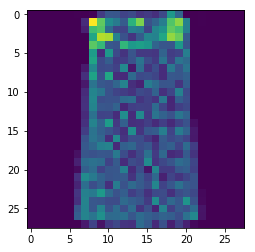

In [11]:
index = 6293
image_flat = np.array([x_test[index]]) # we have to make an array of the image as the model expects (?,784) as input.
pred = model.predict(image_flat) 
print(pred)
print(pred.argmax(), labels[pred.argmax()]) #argmax prints the index of the highest value
print(y_test[index].argmax(), labels[y_test[index].argmax()] )
plt.imshow(x_test_input[index])



With model.predict(image), we can predict the scores for a single image. Remember that we have to convert the image to an array, since the model is expecting *(?,784)* as input.

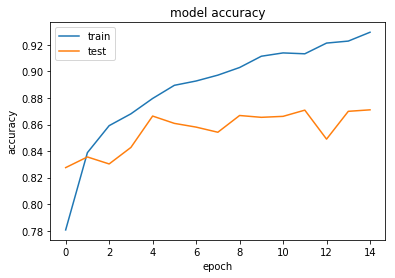

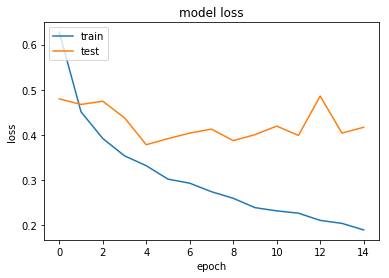

In [12]:
# list all data in history
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Overfitting and Underfitting
Overfitting occurs when the model also learns from the noise and inaccurate data. Underfitting occurs when the model does not learn anything at all. With overfitting you learn to much from the data and with underfitting you learn not enough from the data. ![Overfitting,underfitting and balanced](https://github.com/Barttje/summercourse-ml/blob/master/Overfitting_underfitting.png?raw=true)
### Detecting overfitting/underfitting
Underfitting occurs when the loss is very high and the accuray is very low. Overfitting occurs when there is a gap between the accuracy and loss of the training data set and of the test data set. It occurs more often after multiple epochs, when the model is become more and more complex and fitted to the training data instead of a generalized model for the actual problem. 
![alt text](https://raw.githubusercontent.com/Barttje/summercourse-ml/master/detect_overfitting.png)
#### Handling overfitting
Early Stopping: Instead of going for more runs, let the training stop at the number of runs when the validation accuracy is starting to decrease and the validation loss is starting to increase. 

Drop out layers: Instead of using all the output values from the dense layers, the drop out layers remove outputs and only forward a part of the outputs to the next layer. This decreases the chances that the model is going to overfit. 
#### Handling underfitting
Try to get more training data. More and different kind of training data gives the neural network more data to learn from.

Try more epochs. If  the accuracy is increasing and loss is decreasing, the neural network might not have enough time to learn from the data yet. 

Try to increase the complexity of the model by adding more layers and try to play around with increasing amount of neurons in the layers and different activation and loss functions.